In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


1.Find out how many males and females participated in the test

In [5]:
count=data['gender'].value_counts()
print('Number of Males is ', count['male'])
print('number of Females is ', count['female'])

Number of Males is  482
number of Females is  518


2.What do you think about the students' parental level of education?

In [7]:
ecount=data['parental level of education'].value_counts()
print(ecount)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


(array([179.,   0., 196.,   0., 226.,   0., 222.,   0., 118.,  59.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

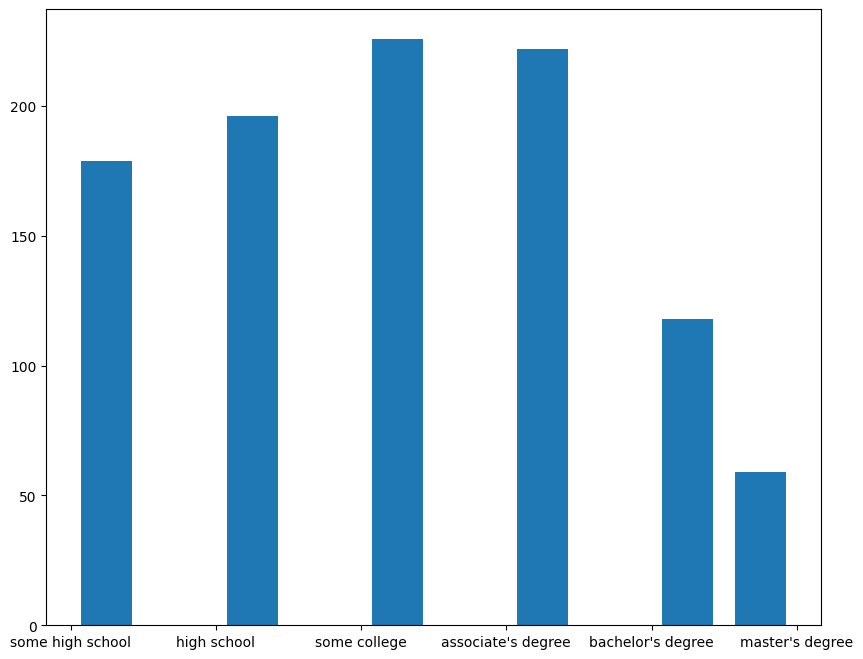

In [19]:
plt.figure(figsize=(10,8))
plt.hist(data['parental level of education'],rwidth=0.7)

It can be concluded that most parent's have some college as educational qualification

3.Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [8]:
gen_avg_score=data.groupby('gender').mean()
gen_avg_sub=gen_avg_score[['math score','reading score','writing score']]
print(gen_avg_sub)


        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


<ipython-input-8-7cef8cc6d498>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_avg_score=data.groupby('gender').mean()


In [14]:
avg_scores_prep = data.groupby('test preparation course').mean()
print(avg_scores_prep)

                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


<ipython-input-14-c38e79cf6349>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_scores_prep = data.groupby('test preparation course').mean()


4.What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [23]:
data.groupby('gender')['math score','reading score','writing score'].std()

<ipython-input-23-4529b9183e9f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('gender')['math score','reading score','writing score'].std()


,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [24]:
data.groupby('test preparation course')['math score','reading score','writing score'].std()

<ipython-input-24-6c0557a38983>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('test preparation course')['math score','reading score','writing score'].std()


,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


5.The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this

In [22]:
data.nlargest(250, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
